In [30]:
import pennylane as qml
import numpy as ap

In [ ]:
def hardware_efficient_ansatz(weights, wires, layers):
    for layer in range(layers):
        for i in range(wires):
            qml.RX(weights[layer * wires + i], wires=i)
        for i in range(wires-1):
            qml.CNOT(wires=[i, i+1])
        for i in range(wires):
            qml.RY(weights[layer * wires + wires + i], wires=i)
    

In [ ]:
dev2 = qml.device('default.qubit', wires=18)  

@qml.qnode(dev2)
def HWE(weights,dimension,layers):
    first_register=list(range(dimension))
    for layer in range(layers):
        for i in range(dimension):
            qml.RX(weights[layer * dimension + i], wires=i)
        for i in range(dimension-1):
            qml.CNOT(wires=[i, i+1])
        for i in range(dimension):
            qml.RY(weights[layer * dimension + dimension + i], wires=i)
    return qml.density_matrix(wires=first_register[1:])

In [ ]:
p_HWE=[]
for l in range (1,5):
    for w in range (2,6):
        for i in range (100):
            weights = ap.random.rand(l* 2 *w)
            m=HWE(weights,w,l)
            p_HWE.append(ap.trace(ap.dot(m,m)))


In [ ]:
P=ap.array(p_HWE)
DATAHWE=P.reshape(4,4,100)

In [36]:
%run Simplified_two_design.ipynb

In [ ]:
dev3 = qml.device('default.qubit', wires=18) 

@qml.qnode(dev3)
def SD(dimension,layers):
    first_register=list(range(dimension))
    weights=simplified_two_design_weights(dimension, layers)
    simplified_two_design(first_register, weights)
    return qml.density_matrix(wires=first_register[1:])

In [ ]:
p_SD=[]
for l in range (1,5):
    for w in range (2,6):
        for i in range (100):
            m=SD(w,l)
            p_SD.append(ap.trace(ap.dot(m,m)))

In [ ]:
P_be=ap.array(p_SD)
DATASD=P_be.reshape(4,4,100)

In [ ]:
dev4 = qml.device('default.qubit', wires=18) 

@qml.qnode(dev4)
def SE(weights,dimension):
    first_register=list(range(dimension))
    qml.StronglyEntanglingLayers(weights=weights, wires=first_register)
    return qml.density_matrix(wires=first_register[1:])

In [ ]:
p_se=[]
for l in range (1,5):
    for w in range (2,6):
        for i in range (100):
            shape_B=qml.StronglyEntanglingLayers.shape(l,w)
            weights = ap.random.random(size=shape_B)
            m=SE(weights,w)
            p_se.append(ap.trace(ap.dot(m,m)))

In [43]:
P_se=ap.array(p_se)
DATASE=P_se.reshape(4,4,100)

/tmp/ipykernel_2898/517550061.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(extracted_data_P, ax=axs[l, w], label='HWE', shade=True)
/home/ruibinx/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ruibinx/.conda/envs/pennylane_env1/lib/python3.9/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/tmp/ipykernel_2898/517550061.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(extracted_data_Q, ax=axs[l, w], label='SD', shade=True)
/home/ruibinx/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1762: Comp

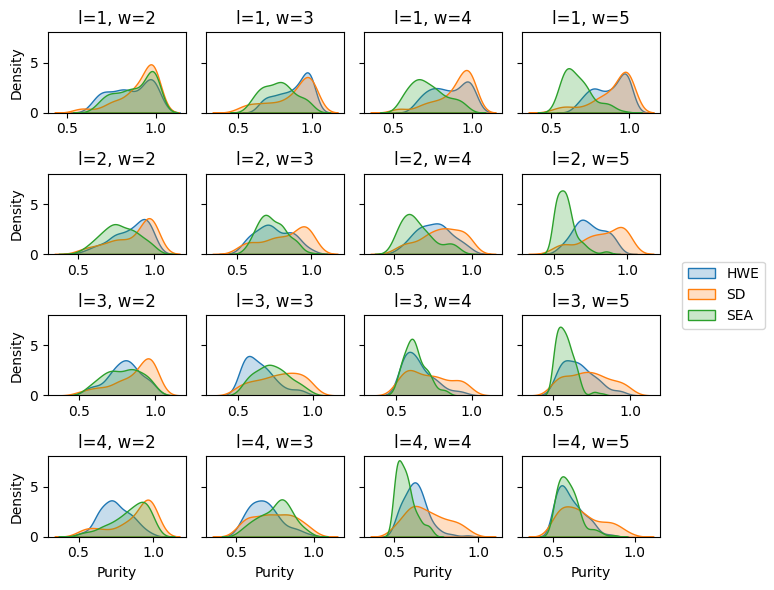

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 4, figsize=(8, 6), sharey=True, squeeze=False)


for l in range(4):
    for w in range(4):

        extracted_data_P = DATAHWE[l, w, :] 
        extracted_data_Q = DATABE[l, w, :]  
        extracted_data_R = DATASE[l, w, :]  
        
        
        sns.kdeplot(extracted_data_P, ax=axs[l, w], label='HWE', shade=True)
        sns.kdeplot(extracted_data_Q, ax=axs[l, w], label='SD', shade=True)
        sns.kdeplot(extracted_data_R, ax=axs[l, w], label='SEA', shade=True)
        axs[l, w].set_title(f'l={l+1}, w={w+2}')
        
        if w != 0:
            axs[l, w].set_ylabel("")
        else:
            axs[l, w].set_ylabel("Density") 
        if l!=3:
            axs[l, w].set_xlabel("")
            
        else:
            axs[l, w].set_xlabel("Purity") 


handles, labels = axs[0, 0].get_legend_handles_labels()


fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.5))


plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig("output_plot1.pdf", dpi=600, bbox_inches="tight")  

plt.show()